**Introducción**




---
Tabla de Contenidos

1.   Leer y explorar la data
2.   Selección de muestras
3.   Pre-selección de variables
4.   Preparación de datos
5.  Construir un modelo deregresiónlineal
6.  Testear el modelo




**Importar Librerias**

```
IMPORTAMOS MÓDULOS COMUNES
```



In [1]:
# Imports comunes
import pandas as pd
import numpy as np

# Configuración de tamaño de gráficos matplotlib
import matplotlib.pyplot as plt

# Cargar seaborn
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# os proporciona funciones para interactuar con el sistema operativo y realizar operaciones relacionadas con archivos y directorios.
import os


**Rendimiento de los estudiantes según datos demograficos**
Las calificaciones de los estudiantes se evidencian en las variables                   

*   grade_1
*   grade_2
*   final_grade
             
Siendo la variable **Final_grade la variabe objetivo**, teniendo encuenta que para predecir esta se debe conciderar las primeras notas las variable grade_1 y grade 2
Este data frame contiene las siguientes columnas:
- **school:** escuela del estudiante(binario: "GP" - Gabriel Pereira o "MS" - Mousinho da Silveira).
- **sex** - sexo del estudiante (binario: "F" - femenino o "M" - masculino)
- **age** - edad del estudiante (numérica: de 15 a 22)
tipo_dirección: tipo de dirección particular del estudiante (binario: "Urbano" o "Rural")
- **family_size** - tamaño de la familia (binario: "Menor o igual a 3" o "Mayor que 3")
- **parent_status**: estado de convivencia de los padres (binario: "Vivir juntos" o "Separados")
- **mother_education** : educación de la madre (ordinal: "ninguna", "educación primaria (cuarto grado)", "quinto a noveno grado", "educación secundaria" o "educación superior")
- **Father_education** : educación del padre (ordinal: "ninguno", "educación primaria (4.º grado)", "5.º a 9.º grado", "educación secundaria" o "educación superior")
- mother_job - trabajo de la madre (nominal: "maestra", "relacionado con la atención de salud", "servicios" civiles (por ejemplo, administrativos o policiales), "en_casa" u "otros")
- Father_job - trabajo del padre (nominal: "maestro", relacionado con la atención "salud", "servicios" civiles (por ejemplo, administrativos o policiales), "en_casa" u "otros")
- school_choice_reason - motivo para elegir esta escuela (nominal: cerca de "casa", "reputación" de la escuela, preferencia de "curso" u "otro")
- tutor - tutor del estudiante (nominal: "madre", "padre" u "otro")
- travel_time: tiempo de viaje de casa a la escuela (ordinal: "<15 min.", "15 a 30 min.", "30 min. a 1 hora", o 4 - ">1 hora")
- Study_time: tiempo de estudio semanal (ordinal: 1 - "<2 horas", "2 a 5 horas", "5 a 10 horas" o ">10 horas")
- class_failures: número de fracasos de clases anteriores (numérico: n si 1<=n<3, en caso contrario 4)
- school_support: apoyo educativo adicional (binario: sí o no)
- family_support - apoyo educativo familiar (binario: sí o no)
- extra_paid_classes - clases extra pagadas dentro de la materia del curso (Matemáticas o Portugués) (binario: sí o no)
- activities - actividades extracurriculares (binario: sí o no)
- nursery_school - asistió a la guardería (binario: sí o no)
- higher_ed  - quiere cursar estudios superiores (binario: sí o no)
- internet_access - Acceso a Internet en casa (binario: sí o no)
- romantic_relationship - con una relación romántica (binario: sí o no)
- family_relationship - calidad de las relaciones familiares (numérica: de 1 - muy mala a 5 - excelente)
- free_time - tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
- social - salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto)
- Weekday_alcohol: consumo de alcohol durante el día laboral (numérico: de 1, muy bajo a 5, muy alto).
- Weekend_alcohol - consumo de alcohol durante el fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
- **health** : estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
- **absences** : número de ausencias escolares (numérico: de 0 a 93)


# LEEMOS Y EXPORTAMOS LA DATA

In [2]:
# Creando carpetas
nombre_carpeta = 'linear_regression'
os.makedirs(nombre_carpeta)
os.makedirs(nombre_carpeta + '/data')
os.makedirs(nombre_carpeta + '/plots')
os.makedirs(nombre_carpeta + '/results')

In [3]:
#cargamos la data
pddf = pd.read_csv('linear_regression/data/student_math_clean.csv')

In [4]:
#Validar la data de forma general
pddf.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
pddf.shape

(395, 34)

In [6]:
# Verificar si hay valores nulos en el DataFrame
valores_nulos = pddf.isnull().sum()
valores_nulos


student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64

In [7]:
#Informacion de datos
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [8]:
pddf.final_grade.info()

<class 'pandas.core.series.Series'>
RangeIndex: 395 entries, 0 to 394
Series name: final_grade
Non-Null Count  Dtype
--------------  -----
395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [9]:
pddf.final_grade.mean()

10.415189873417722

In [10]:
#Variable objetivo
target='final_grade'

In [11]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = pddf.select_dtypes(include=['number']).columns.tolist()
variables_numericas.remove(target)
variables_numericas.remove('student_id')


In [12]:
variables_numericas

['age',
 'class_failures',
 'family_relationship',
 'free_time',
 'social',
 'weekday_alcohol',
 'weekend_alcohol',
 'health',
 'absences',
 'grade_1',
 'grade_2']

In [13]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = pddf.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['school',
 'sex',
 'address_type',
 'family_size',
 'parent_status',
 'mother_education',
 'father_education',
 'mother_job',
 'father_job',
 'school_choice_reason',
 'guardian',
 'travel_time',
 'study_time',
 'school_support',
 'family_support',
 'extra_paid_classes',
 'activities',
 'nursery_school',
 'higher_ed',
 'internet_access',
 'romantic_relationship']

In [14]:
# Guardando variables en una tabla
dataResume = pd.DataFrame({'feature' : variables_numericas, 'type' : 'numeric'})
dataResume = dataResume.append(pd.DataFrame({'feature' : [target], 'type' : 'target'}))
dataResume.to_csv('linear_regression/results/dataResume.csv', index = 0)

<ipython-input-14-24c90fc23702>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataResume = dataResume.append(pd.DataFrame({'feature' : [target], 'type' : 'target'}))


<Figure size 400x600 with 0 Axes>

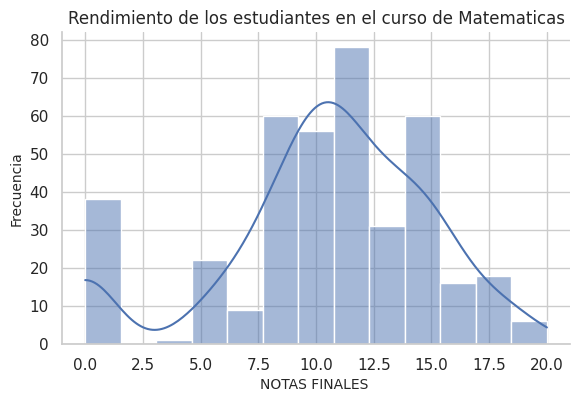

In [15]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

# Gráfico de distribución
sns.displot(pddf['final_grade'], height=4, aspect=1.5, kde=True)
plt.title("Rendimiento de los estudiantes en el curso de Matematicas", fontsize=12)  # Título del gráfico
plt.xlabel("NOTAS FINALES ", fontsize=10)  # Nombre del eje x
plt.ylabel("Frecuencia", fontsize=10)  # Nombre del eje y

plt.savefig("FRECUENCIA_NOTAS_FINALES.png")  # Guarda el gráfico como un archivo PNG
plt.show()

# GRAFICAMOS TODAS LAS VARIABLES

In [16]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

for col in variables_numericas:
  # Gráfico de distribución
  sns.displot(pddf[col], height=4, aspect=1.5, kde=True)
  plt.title("Distribución de " + col, fontsize=12)  # Título del gráfico
  plt.xlabel(col, fontsize=10)  # Nombre del eje x
  plt.ylabel("Frecuencia", fontsize=10)  # Nombre del eje y
  plt.savefig("linear_regression/plots/dist_" + col + ".png")  # Guarda el gráfico como un archivo PNG
  plt.close()

<Figure size 400x600 with 0 Axes>

#  SELECCIONAMOS LA MUESTRA

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf, # Base de datos
                               train_size = 0.7, # Especificar el tamaño de train/test
                               random_state = 123) # Semilla aleatoria


In [18]:
print(f"Tamaño del total de datos: {len(pddf)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 395
Tamaño de train: 276
Tamaño de test: 119


In [19]:
variables_numericas

['age',
 'class_failures',
 'family_relationship',
 'free_time',
 'social',
 'weekday_alcohol',
 'weekend_alcohol',
 'health',
 'absences',
 'grade_1',
 'grade_2']

Analisis exploratorio de la relación de datos

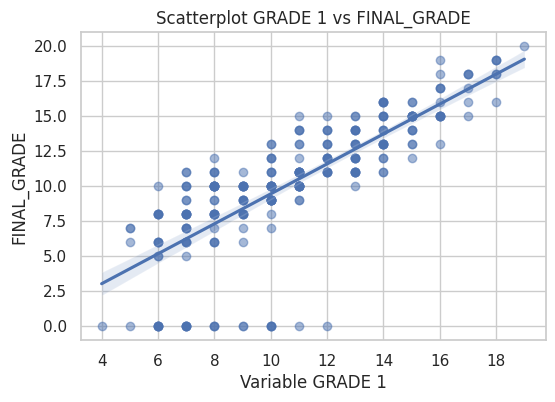

In [20]:
# Crear scatterplot
plt.figure(figsize=(6, 4))
sns.regplot(x = train.grade_1, y = train.final_grade, scatter_kws={"alpha": 0.5})
# Personalizar el título y los nombres de los ejes
plt.title(f"Scatterplot GRADE 1 vs FINAL_GRADE")
plt.xlabel("Variable GRADE 1")
plt.ylabel("FINAL_GRADE")

# Mostrar el gráfico
plt.show()

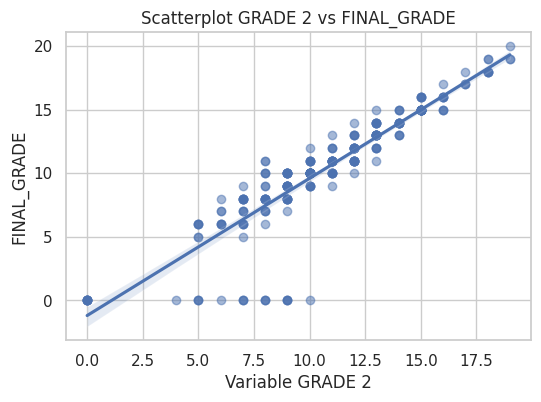

In [60]:
# Crear scatterplot
plt.figure(figsize=(6, 4))
sns.regplot(x = train.grade_2, y = train.final_grade, scatter_kws={"alpha": 0.5})
# Personalizar el título y los nombres de los ejes
plt.title(f"Scatterplot GRADE 2 vs FINAL_GRADE")
plt.xlabel("Variable GRADE 2")
plt.ylabel("FINAL_GRADE")

# Mostrar el gráfico
plt.show()

# TARGET ENCODING

In [21]:
%%capture
!pip install category_encoders

In [22]:
# Aplicando category encoders
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist', # Qué hacer con categorias nuevas desconocidas
                        handle_missing = 'value', # Qué hacer con missings
                        min_samples_leaf = 30) # Cantidad mínima de N por categoría


In [23]:
encoder.fit(train[variables_categoricas].astype('category'), train[target])

train[[x + '_coded' for x in variables_categoricas]] = encoder.transform(train[variables_categoricas].astype('category'))
test[[x + '_coded' for x in variables_categoricas]] = encoder.transform(test[variables_categoricas].astype('category'))


In [24]:
test[['sex','sex_coded']].drop_duplicates()

,sex,sex_coded
252,M,10.926773
275,F,9.816996


# PRE-SELECCION DE VARIABLES

In [25]:
# Dando formato a nuestra tabla resumen

pdResume = train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)

In [26]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,student_id,276.0,200.652174,115.653788,2.000000,99.750000,200.500000,305.250000,395.000000,0.0
25,study_time_coded,276.0,10.274930,0.280883,10.132357,10.132357,10.135292,10.135292,10.900285,0.0
19,father_education_coded,276.0,10.321641,0.836625,9.082595,10.171505,10.171505,10.328266,11.571632,0.0
20,mother_job_coded,276.0,10.170489,0.443609,9.688991,9.688991,10.187388,10.319328,11.044947,0.0
21,father_job_coded,276.0,10.135771,0.278824,9.963863,9.963863,10.053693,10.053693,11.006093,0.0


In [27]:
# Calculando las correlaciones de todas las variables con el target
correlations = train.corr()[[target]]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               target : 'corr'}, inplace = True)

correlations.head()

<ipython-input-27-79fa3698ee3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()[[target]]


,feature,corr
0,student_id,-0.123693
1,age,-0.156276
2,class_failures,-0.300042
3,family_relationship,-0.032420
4,free_time,0.039456


In [28]:
# Cruzando correlaciones con la tabla de resumen original
univariate = pd.merge(pdResume, correlations, on = 'feature')
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,student_id,276.0,200.652174,115.653788,2.000000,99.750000,200.500000,305.250000,395.000000,0.0,-0.123693
1,study_time_coded,276.0,10.274930,0.280883,10.132357,10.132357,10.135292,10.135292,10.900285,0.0,0.075774
2,father_education_coded,276.0,10.321641,0.836625,9.082595,10.171505,10.171505,10.328266,11.571632,0.0,0.195750
3,mother_job_coded,276.0,10.170489,0.443609,9.688991,9.688991,10.187388,10.319328,11.044947,0.0,0.160695
4,father_job_coded,276.0,10.135771,0.278824,9.963863,9.963863,10.053693,10.053693,11.006093,0.0,0.173529


In [29]:
# Creamos la columna correlacion absoluta
univariate['abs_corr'] = univariate['corr'].apply(lambda x: abs(x))
univariate.sort_values(by = 'abs_corr', ascending = False, inplace=True)
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
22,final_grade,276.0,10.311594,4.466930,0.000000,8.000000,10.000000,13.000000,20.000000,0.0,1.000000,1.000000
23,grade_2,276.0,10.648551,3.734317,0.000000,8.750000,10.000000,13.000000,19.000000,0.0,0.902549,0.902549
24,grade_1,276.0,10.800725,3.291885,4.000000,8.000000,10.000000,13.000000,19.000000,0.0,0.788160,0.788160
32,class_failures,276.0,0.362319,0.776398,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,-0.300042,0.300042
16,mother_education_coded,276.0,10.355340,0.914981,9.297913,9.496494,10.342052,11.581956,11.581956,0.0,0.219987,0.219987


In [30]:
# Guardando resultados
univariate.to_csv('linear_regression/results/univariate_assesment.csv', index = 0)

In [31]:
preselection = univariate.loc[(univariate.abs_corr >= 0.15) & (univariate.missing_rate <= 0.8)]
print(f"{len(preselection)} variables de {len(univariate)} pasan el proceso de pre-selección")

10 variables de 34 pasan el proceso de pre-selección


In [32]:
preselection

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
22,final_grade,276.0,10.311594,4.466930,0.000000,8.000000,10.000000,13.000000,20.000000,0.0,1.000000,1.000000
23,grade_2,276.0,10.648551,3.734317,0.000000,8.750000,10.000000,13.000000,19.000000,0.0,0.902549,0.902549
24,grade_1,276.0,10.800725,3.291885,4.000000,8.000000,10.000000,13.000000,19.000000,0.0,0.788160,0.788160
32,class_failures,276.0,0.362319,0.776398,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,-0.300042,0.300042
16,mother_education_coded,276.0,10.355340,0.914981,9.297913,9.496494,10.342052,11.581956,11.581956,0.0,0.219987,0.219987
2,father_education_coded,276.0,10.321641,0.836625,9.082595,10.171505,10.171505,10.328266,11.571632,0.0,0.195750,0.195750
4,father_job_coded,276.0,10.135771,0.278824,9.963863,9.963863,10.053693,10.053693,11.006093,0.0,0.173529,0.173529
14,higher_ed_coded,276.0,10.440418,0.139980,9.811950,10.471483,10.471483,10.471483,10.471483,0.0,0.161288,0.161288
3,mother_job_coded,276.0,10.170489,0.443609,9.688991,9.688991,10.187388,10.319328,11.044947,0.0,0.160695,0.160695
9,age,276.0,16.771739,1.288579,15.000000,16.000000,17.000000,18.000000,22.000000,0.0,-0.156276,0.156276


# OUTLIERS

In [37]:
# Crear figura y subplots

sns.boxplot(data=train[[target]], orient="h", ax=ax1)


<Axes: title={'center': 'Variable Original'}>

In [38]:
#Leyendo tabla resumen
univariate_II = pd.read_csv('linear_regression/results/univariate_assesment.csv')
univariate_II.head()

univariate_II['ric']     = univariate_II['Q3'] - univariate_II['Q1']
univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,final_grade,276.0,10.311594,4.466930,0.000000,8.000000,10.000000,13.000000,20.000000,0.0,1.000000,1.000000,5.000000,0.5000,20.50000
1,grade_2,276.0,10.648551,3.734317,0.000000,8.750000,10.000000,13.000000,19.000000,0.0,0.902549,0.902549,4.250000,2.3750,19.37500
2,grade_1,276.0,10.800725,3.291885,4.000000,8.000000,10.000000,13.000000,19.000000,0.0,0.788160,0.788160,5.000000,0.5000,20.50000
3,class_failures,276.0,0.362319,0.776398,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,-0.300042,0.300042,0.000000,0.0000,0.00000
4,mother_education_coded,276.0,10.355340,0.914981,9.297913,9.496494,10.342052,11.581956,11.581956,0.0,0.219987,0.219987,2.085463,6.3683,14.71015


In [43]:
preselection_num=list(set(preselection.feature.tolist())-set(['mother_job_coded','mother_education_coded','father_job_coded',
                                            'higher_ed_coded','father_education_coded','class_failures']))
preselection_num

['grade_1', 'age', 'final_grade', 'grade_2']

In [44]:
# Tratamiento de outliers por RIC

for col in preselection_num:
  desc = univariate_II.loc[univariate_II.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  test[col + '_tric']  = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
train.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,extra_paid_classes_coded,activities_coded,nursery_school_coded,higher_ed_coded,internet_access_coded,romantic_relationship_coded,grade_1_tric,age_tric,grade_2_tric,final_grade_tric
5,6,GP,M,16,Urban,Less than or equal to 3,Living together,higher education,secondary education,services,...,10.818125,10.606665,10.481982,10.471483,10.482301,10.513661,15,16.0,15.0,15.0
240,241,GP,M,17,Urban,Less than or equal to 3,Living together,higher education,secondary education,health,...,9.916131,10.606665,10.481982,10.471483,10.482301,9.914707,12,17.0,12.0,12.0
241,242,GP,M,17,Rural,Less than or equal to 3,Apart,higher education,higher education,teacher,...,10.818125,9.960341,10.481982,10.471483,10.482301,10.513661,10,17.0,11.0,12.0
19,20,GP,M,16,Urban,Less than or equal to 3,Living together,higher education,secondary education,health,...,10.818125,10.606665,10.481982,10.471483,10.482301,10.513661,8,16.0,10.0,10.0
29,30,GP,M,16,Urban,Greater than 3,Living together,higher education,higher education,teacher,...,10.818125,10.606665,10.481982,10.471483,10.482301,9.914707,10,16.0,12.0,11.0


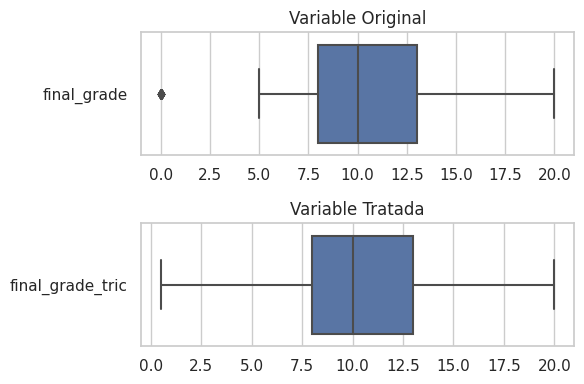

In [45]:
# Crear figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

ax1 = axes[0]
sns.boxplot(data=train[[target]], orient="h", ax=ax1)
ax1.set_title('Variable Original')

ax2 = axes[1]
sns.boxplot(data=train[['final_grade_tric']], orient="h", ax=ax2)
ax2.set_title('Variable Tratada')
# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

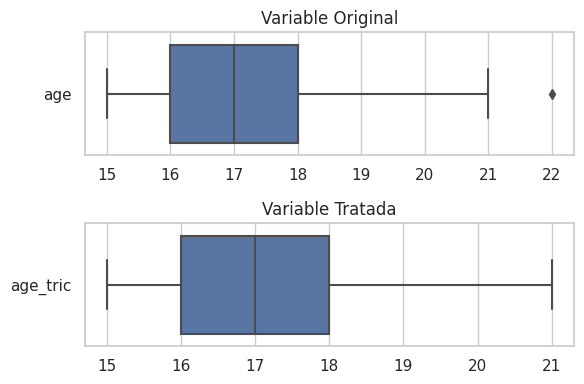

In [46]:
# Crear figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

ax1 = axes[0]
sns.boxplot(data=train[['age']], orient="h", ax=ax1)
ax1.set_title('Variable Original')

ax2 = axes[1]
sns.boxplot(data=train[['age_tric']], orient="h", ax=ax2)
ax2.set_title('Variable Tratada')
# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# MISSINGS

# ESTANDARIZACION

In [47]:
preselection.feature.tolist()

['final_grade',
 'grade_2',
 'grade_1',
 'class_failures',
 'mother_education_coded',
 'father_education_coded',
 'father_job_coded',
 'higher_ed_coded',
 'mother_job_coded',
 'age']

In [48]:
actual_features = [
    'final_grade_tric',
    'grade_2_tric',
    'grade_1_tric',
    'class_failures',
    'mother_education_coded',
    'father_education_coded',
    'father_job_coded',
    'higher_ed_coded',
    'mother_job_coded',
    'age_tric']

# estandarizando las variables para mantener todas en una misma escala
train[[x + '_std' for x in actual_features]] = (train[actual_features] - train[actual_features].mean())/train[actual_features].std()
test[[x + '_std' for x in actual_features]] = (test[actual_features] - train[actual_features].mean())/train[actual_features].std()


# Modelo de regresión Lineal

<Axes: >

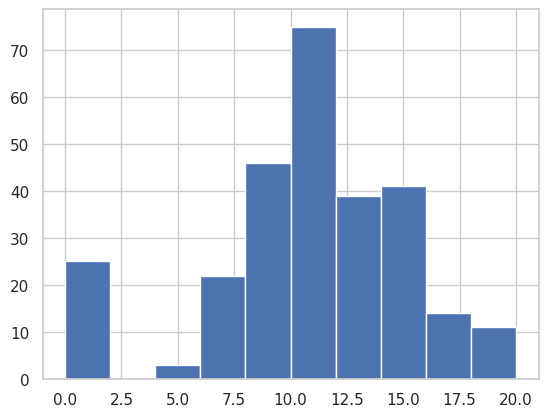

In [49]:
train.final_grade.hist()

In [50]:
actual_features = [x + '_std' for x in actual_features]

In [51]:
actual_features.remove('final_grade_tric_std')

In [52]:
actual_features

['grade_2_tric_std',
 'grade_1_tric_std',
 'class_failures_std',
 'mother_education_coded_std',
 'father_education_coded_std',
 'father_job_coded_std',
 'higher_ed_coded_std',
 'mother_job_coded_std',
 'age_tric_std']

Primer modelo

In [53]:
train.class_failures

5      0
240    0
241    0
19     0
29     0
      ..
230    0
98     0
322    0
382    0
365    0
Name: class_failures, Length: 276, dtype: int64

In [54]:
#train.replace([np.inf,-np.inf],np.nan)

In [46]:
#train = train.dropna()

In [55]:
train.shape

(276, 69)

In [56]:
test.shape

(119, 69)

In [48]:
import statsmodels.api as sm

# Fit and summarize OLS model
lr = sm.OLS(train[target], #variable objetivo
             sm.add_constant(train[actual_features]))
model = lr.fit()

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.04e-93
Time:                        18:36:29   Log-Likelihood:                -567.50
No. Observations:                 276   AIC:                             1155.
Df Residuals:                     266   BIC:                             1191.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               